In [82]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

data = pd.read_csv('course.csv')
print(data)
data = data[(data.Age < 80) & (data.Position < 500) & (data.Position > 0)]

     Position Sexe     Temps  Dept  Temps_secondes   Age
0           1    M  00:32:23    76          779543  40.0
1           2    M  00:32:40    27          779560  34.0
2           3    M  00:33:15    76          779595  44.0
3           4    M  00:33:23    76          779603  46.0
4           5    M  00:33:29    76          779609  26.0
..        ...  ...       ...   ...             ...   ...
335       336    F  01:08:34    27          781714  41.0
336       337    F  01:08:36    27          781716  48.0
337       338    M  01:09:31    27          781771  24.0
338       339    F  01:09:31    27          781771  25.0
339       340    F  01:10:31    76          781831  41.0

[340 rows x 6 columns]


In [83]:
data['Dept'].unique()

array([76, 27, 14, 78])

In [84]:
data.isnull().sum()

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               0
dtype: int64

In [85]:
data.isnull().sum()

Position          0
Sexe              2
Temps             0
Dept              0
Temps_secondes    0
Age               0
dtype: int64

In [86]:
data.dtypes

Position            int64
Sexe               object
Temps              object
Dept                int64
Temps_secondes      int64
Age               float64
dtype: object

In [87]:
print(data)

     Position Sexe     Temps  Dept  Temps_secondes   Age
0           1    M  00:32:23    76          779543  40.0
1           2    M  00:32:40    27          779560  34.0
2           3    M  00:33:15    76          779595  44.0
3           4    M  00:33:23    76          779603  46.0
4           5    M  00:33:29    76          779609  26.0
..        ...  ...       ...   ...             ...   ...
335       336    F  01:08:34    27          781714  41.0
336       337    F  01:08:36    27          781716  48.0
337       338    M  01:09:31    27          781771  24.0
338       339    F  01:09:31    27          781771  25.0
339       340    F  01:10:31    76          781831  41.0

[333 rows x 6 columns]


In [88]:
data.describe()

,Position,Dept,Temps_secondes,Age
count,333.000000,333.000000,333.000000,333.000000
mean,170.351351,57.072072,780552.684685,41.756757
std,98.451289,25.017239,516.374204,11.984088
min,1.000000,14.000000,779543.000000,18.000000
25%,86.000000,27.000000,780201.000000,34.000000
50%,170.000000,76.000000,780536.000000,41.000000
75%,255.000000,76.000000,780906.000000,49.000000
max,340.000000,78.000000,781831.000000,73.000000


In [89]:
data.loc[data[['Position','Sexe', 'Dept','Age']].duplicated(keep = False),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age


In [90]:
data['Sexe'].unique()

array(['M', 'F', 'O', nan], dtype=object)

In [91]:
data['Temps_format'] = pd.to_datetime(data['Temps'], errors="coerce")
data.loc[data['Temps_format'].isnull(),:]

,Position,Sexe,Temps,Dept,Temps_secondes,Age,Temps_format
250,251,M,54min47s,27,780887,42.0,NaT


In [92]:
data.iloc[250,:]

Position                          256
Sexe                                M
Temps                        00:55:08
Dept                               78
Temps_secondes                 780908
Age                              42.0
Temps_format      2022-06-28 00:55:08
Name: 255, dtype: object

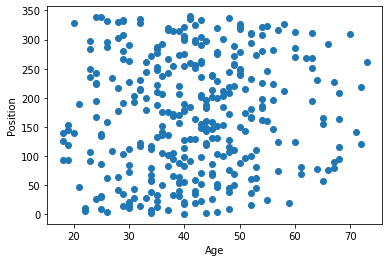

In [93]:
plt.plot(data['Age'],data['Position'], "o")
plt.xlabel("Age")
plt.ylabel("Position")
plt.show()

In [97]:
taille_classe = 10
groupes = []
tranches = np.arange(0, 80, taille_classe)
tranches = np.add(tranches, taille_classe/2, out = tranches, casting="unsafe" )
# on décale les tranches d'une demi taille de classe
indices = np.digitize(data['Age'], tranches) 
print(indices)

[4 3 4 5 3 2 3 4 3 5 3 2 4 3 3 3 5 4 6 4 3 4 4 4 6 2 5 3 3 3 4 3 4 4 3 4 5
 3 5 4 4 3 3 5 5 5 2 5 5 4 5 4 4 4 4 3 7 4 3 5 3 5 3 4 4 3 5 6 5 4 5 3 6 5
 7 6 3 7 5 6 4 4 3 5 3 5 4 7 4 2 2 2 4 7 5 4 4 5 5 4 5 3 4 4 2 5 3 5 5 3 3
 4 5 7 3 3 4 2 7 4 3 6 6 2 5 4 4 4 5 5 4 3 4 4 3 2 2 7 4 4 5 2 5 6 4 4 5 5
 4 5 2 4 7 4 3 5 6 4 5 7 4 7 5 5 2 4 4 4 5 4 5 4 4 3 4 3 4 5 5 4 4 5 5 4 4
 4 2 3 3 6 2 4 6 5 3 5 4 5 5 3 4 4 4 7 5 4 5 6 3 5 5 3 3 5 7 5 4 4 2 6 2 5
 3 7 5 6 3 5 3 2 4 5 4 5 5 5 2 4 3 5 6 5 4 5 2 4 6 4 4 4 4 5 5 4 4 7 3 3 4
 3 4 6 6 6 5 3 5 4 4 5 4 5 5 5 3 6 4 2 4 6 4 3 5 4 3 7 4 5 3 4 2 4 4 4 5 3
 4 4 4 3 5 7 5 6 5 6 4 4 4 6 5 5 4 4 5 5 6 4 6 5 3 2 3 3 3 3 4 3 4 5 2 3 4]


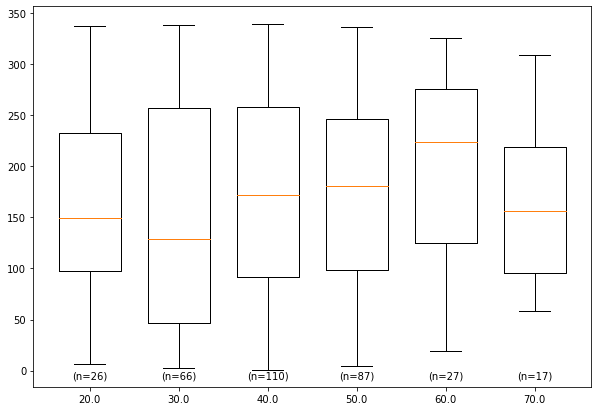

In [98]:
for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    position = data.loc[indices==ind,"Position"] # sélection des individus de la tranche ind
    if len(position) > 0:
        g = {
            'valeurs': position,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(position),
            'quartiles': [np.percentile(position,p) for p in [25,50,75]]
        }
        groupes.append(g)

plt.figure(figsize=(10,7))
        
# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7) # largeur graphique des boxplots

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.show()

In [102]:
import statsmodels.api as sm
Y = data['Position']
X = data[["Age"]].copy()
X['intercept'] = 1
result = sm.OLS(Y, X).fit()

a,b = result.params
print(a, b, result.rsquared)

0.7274856479508072 139.973910105838 0.007841804772211303
